In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import pandas as pd
import os


25-08-03 20:51:54 - Directory /root/.deepface has been created
25-08-03 20:51:54 - Directory /root/.deepface/weights has been created


In [ ]:
pip install opencv-python deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.9/288.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e41878260f1ab1b96493dd0614d18eb33bc901c0973649a586ffdf879d663a30
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successful

In [ ]:
# Function to approximate valence and arousal from DeepFace emotions
def extract_valence_arousal(emotions):
    # Valence = positive - negative emotions
    valence = (emotions['happy'] + emotions['surprise']) - (emotions['sad'] + emotions['angry'] + emotions['fear'])
    valence /= 100

    # Arousal = intensity of active emotions
    arousal = (emotions['happy'] + emotions['angry'] + emotions['fear'] + emotions['surprise']) / 400
    return valence, arousal

# Load video
video_path = "/sample.mp4"
cap = cv2.VideoCapture(video_path)
frame_rate = 1  # Sample one frame per second
frame_count = 0
fps = cap.get(cv2.CAP_PROP_FPS)

# Store results
valence_scores = []
arousal_scores = []
timestamps = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if int(cap.get(1)) % int(fps * frame_rate) == 0:
        try:
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            emotions = result[0]['emotion']
            valence, arousal = extract_valence_arousal(emotions)

            valence_scores.append(valence)
            arousal_scores.append(arousal)
            timestamps.append(int(cap.get(1)) // int(fps))

        except Exception as e:
            print(f"Error at frame {frame_count}: {e}")

    frame_count += 1

cap.release()

# Save to CSV
df = pd.DataFrame({
    'Time (s)': timestamps,
    'Valence': valence_scores,
    'Arousal': arousal_scores
})
df.to_csv("laughter_emotion_trajectory.csv", index=False)
print("CSV saved: laughter_emotion_trajectory.csv")

# Plot valence and arousal over time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, valence_scores, label="Valence", color='green', linewidth=2)
plt.plot(timestamps, arousal_scores, label="Arousal", color='orange', linewidth=2)
plt.title("Valence–Arousal Trajectory During Self-Induced Laughter")
plt.xlabel("Time (seconds)")
plt.ylabel("Score")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("valence_arousal_plot.png")  # Save plot as image
plt.show()




NameError: name 'cv2' is not defined

Starting video analysis...
Video analysis completed.
CSV saved: laughter_emotion_6.csv


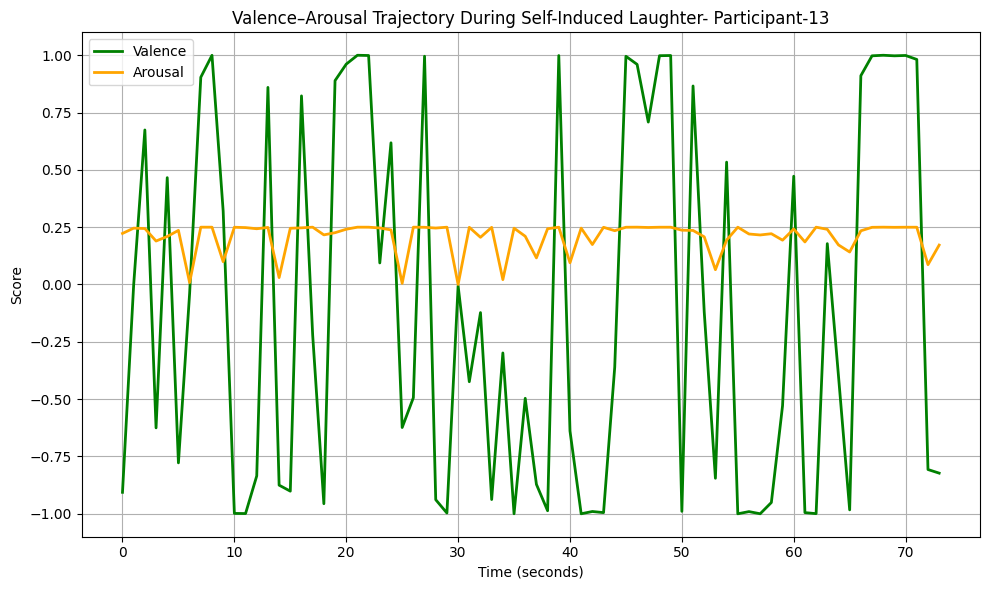

In [ ]:
from deepface import DeepFace
# Function to approximate valence and arousal from DeepFace emotions
def extract_valence_arousal(emotions):
    valence = (emotions['happy'] + emotions['surprise']) - (emotions['sad'] + emotions['angry'] + emotions['fear'])
    valence /= 100  # Normalise to -1 to 1 range approx
    arousal = (emotions['happy'] + emotions['angry'] + emotions['fear'] + emotions['surprise']) / 400
    return valence, arousal

# ==== VIDEO PATH ====
video_path = "/content/drive/MyDrive/sampleVideos/Sample_Video_12.mp4"

# Check if video exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video not found at: {video_path}")

# Initialise video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise Exception("Video file could not be opened.")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_rate = 1  # One frame per second
frame_count = 0

# Initialise storage
valence_scores = []
arousal_scores = []
timestamps = []

print("Starting video analysis...")
while True:
    # Set frame position manually based on fps
    frame_id = int(frame_count * fps * frame_rate)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()

    if not ret:
        break

    try:
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        emotions = result[0]['emotion']
        valence, arousal = extract_valence_arousal(emotions)
        valence_scores.append(valence)
        arousal_scores.append(arousal)
        timestamps.append(frame_count)

    except Exception as e:
        print(f"Error at time {frame_count}s: {e}")
    frame_count += 1
cap.release()
print("Video analysis completed.")
# Save to CSV
df = pd.DataFrame({
    'Time (s)': timestamps,
    'Valence': valence_scores,
    'Arousal': arousal_scores
})
df.to_csv("laughter_emotion_trajectory_13.csv", index=False)
print("CSV saved: laughter_emotion_6.csv")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(timestamps, valence_scores, label="Valence", color='green', linewidth=2)
plt.plot(timestamps, arousal_scores, label="Arousal", color='orange', linewidth=2)
plt.title("Valence–Arousal Trajectory During Self-Induced Laughter- Participant-13")
plt.xlabel("Time (seconds)")
plt.ylabel("Score")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("valence_arousal_plot.png")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
True


In [ ]:
import os
video_path = "/content/drive/MyDrive/sampleVideos/participant2.mp4"
print(os.path.exists(video_path))  # Should return True

True


In [ ]:
import cv2

video_path = "/content/drive/MyDrive/sampleVideos/Sample_Video_9.mp4"

cap = cv2.VideoCapture(video_path)
if cap.isOpened():
    print("Video opened successfully.")
else:
    print("❌ Video file could not be opened.")


Video opened successfully.


CSV saved: laughter_emotion_trajectory.csv


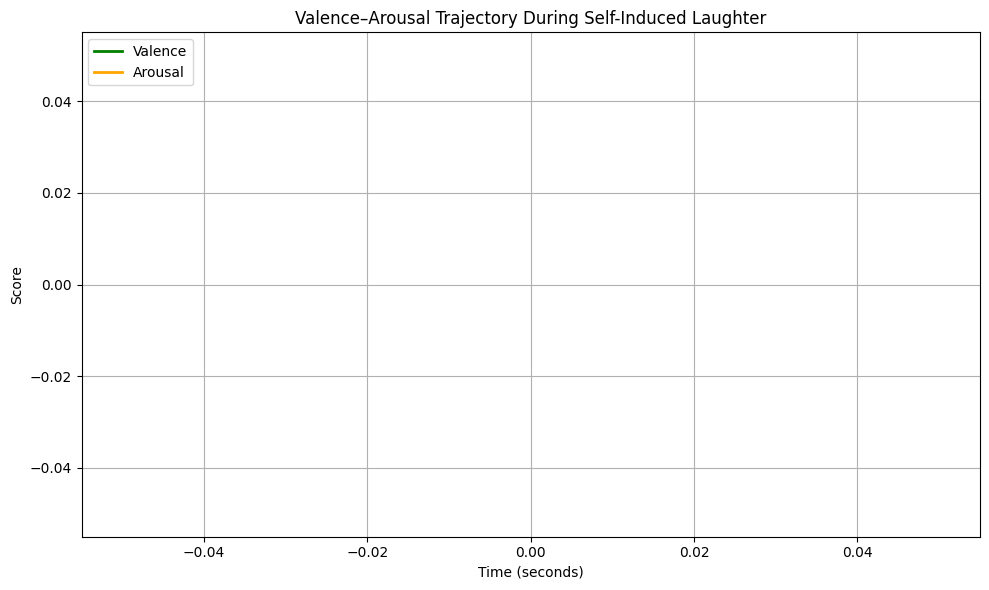

In [ ]:
# Function to approximate valence and arousal from DeepFace emotions
def extract_valence_arousal(emotions):
    # Valence = positive - negative emotions
    valence = (emotions['happy'] + emotions['surprise']) - (emotions['sad'] + emotions['angry'] + emotions['fear'])
    valence /= 100

    # Arousal = intensity of active emotions
    arousal = (emotions['happy'] + emotions['angry'] + emotions['fear'] + emotions['surprise']) / 400
    return valence, arousal

# Load video
video_path = "/content/drive/MyDrive/Sample_Videos/Sample_Video_1.mp4"
cap = cv2.VideoCapture(video_path)
frame_rate = 1  # Sample one frame per second
frame_count = 0
fps = cap.get(cv2.CAP_PROP_FPS)

# Store results
valence_scores = []
arousal_scores = []
timestamps = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if int(cap.get(1)) % int(fps * frame_rate) == 0:
        try:
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            emotions = result[0]['emotion']
            valence, arousal = extract_valence_arousal(emotions)

            valence_scores.append(valence)
            arousal_scores.append(arousal)
            timestamps.append(int(cap.get(1)) // int(fps))

        except Exception as e:
            print(f"Error at frame {frame_count}: {e}")

    frame_count += 1

cap.release()

# Save to CSV
df = pd.DataFrame({
    'Time (s)': timestamps,
    'Valence': valence_scores,
    'Arousal': arousal_scores
})
df.to_csv("laughter_emotion_trajectory.csv", index=False)
print("CSV saved: laughter_emotion_trajectory.csv")

# Plot valence and arousal over time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, valence_scores, label="Valence", color='green', linewidth=2)
plt.plot(timestamps, arousal_scores, label="Arousal", color='orange', linewidth=2)
plt.title("Valence–Arousal Trajectory During Self-Induced Laughter")
plt.xlabel("Time (seconds)")
plt.ylabel("Score")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("valence_arousal_plot.png")  # Save plot as image
plt.show()

